## Carbon dioxide

In order to compare our measurements to modelled data for carbon dioxide ($\mathrm{CO_2}$), we should use the high time resolution workflow. Thia allows us to extract and use the correct footprints and emissions to account for the natural diurnal cycle.

In [10]:
import os
import matplotlib.pyplot as plt
from openghg.localclient import get_obs_surface
from openghg.modules import Emissions, Footprints, ObsSurface
from openghg.processing import footprints_data_merge, search

# object_store = "/work/<username>/object_store"

# Or to create a temporary object store if testing on your local machine
import tempfile
tmp_dir = tempfile.TemporaryDirectory()
object_store = tmp_dir.name  # "/tmp/openghg_store"

os.environ["OPENGHG_PATH"] = object_store

## Loading the data files

In [11]:
## Defining inputs

site = "TAC"
network = "DECC"
height = "100m"

domain = "EUROPE"
species = "co2"

In [12]:
## Observations

obs_file = "../data/DECC/tac.picarro.hourly.100m.test.dat"
ObsSurface.read_file(filepath=obs_file, data_type="CRDS", site=site, network=network, inlet=height)

Processing: tac.picarro.hourly.100m.test.dat: 100%|██████████| 1/1 [00:00<00:00, 10.64it/s]


defaultdict(dict,
            {'processed': {'tac.picarro.hourly.100m.test.dat': {'ch4': 'b068098c-4374-4f15-a6e0-e1f807ff2ea7',
               'co2': 'b63934af-b338-4445-bc89-f3c0c7ed3f6c'}}})

In [13]:
## Footprints

fp_file_path = "../data/footprints/TAC-100magl_UKV_co2_TEST_201407.nc"

model = "NAME"
metmodel = "UKV"

Footprints.read_file(filepath=fp_file_path, site=site, height=height, domain=domain, model=model, metmodel=metmodel, species=species)

{'tac_europe_NAME_100m': '291ec4df-9929-44b8-bbb5-3636a67e0dc2'}

In [14]:
## Emissions

flux_file_path = "../data/emissions/co2-rtot-cardamom-2hr_TEST_2014.nc"

source = "rtot-cardamom"
date = "2014"

Emissions.read_file(filepath=flux_file_path, species=species, source=source, domain=domain, date=date, high_time_resolution=True)

{'co2_rtotcardamom_europe_2014': '35aed7e1-f6a2-44d6-ae98-f75dc5310142'}

## Combining data

In [15]:
start_date = "2014-07-01"
end_date = "2014-07-04"

CombinedData_HiTRes = footprints_data_merge(site=site, height=height, domain=domain, network=network,
                                            start_date=start_date, end_date=end_date, flux_sources=source,
                                            species=species, load_flux=True, calc_timeseries=True,
                                            time_resolution="high")


/user/home/rt17603/work/environments/openghg_env/lib/python3.8/site-packages/xarray/core/indexes.py:97: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  indexer = index.slice_indexer(


Calculating modelled timeseries comparison:


100%|██████████| 71/71 [00:00<00:00, 141.16it/s]


In [16]:
data = CombinedData_HiTRes.data

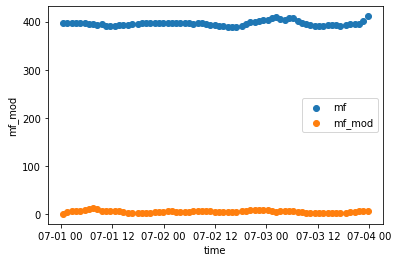

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

data.plot.scatter(x="time", y="mf",ax=ax, label="mf")
data.plot.scatter(x="time", y="mf_mod",ax=ax, label="mf_mod")

ax.legend()


In [18]:
data.time.dtype

dtype('<M8[ns]')